In [10]:
import numpy as np
import pandas as pd

from load import load_pseudo, load_nucleotides

pd.options.display.precision = 3
pd.options.display.max_colwidth = 10

In [2]:
%time records = load_pseudo()
records

CPU times: user 4.57 s, sys: 265 ms, total: 4.84 s
Wall time: 4.85 s


,id,sequence,missing,missing %,sequence_i,missing_i,missing %_i,carb,toby
0,TA151,ATGAGT...,31842,6.588,ATGAGT...,28410,5.878,True,False
1,IC1,ATGAGT...,46071,9.532,ATGAGT...,34714,7.182,False,False
2,A237,ATGAGT...,44514,9.210,ATGAGT...,35933,7.434,True,False
3,5920,ATGAGT...,49497,10.241,ATGAGT...,36873,7.629,NaN,NaN
4,LiA96,ATGAGT...,44067,9.117,ATGAGT...,34454,7.128,False,False
...,...,...,...,...,...,...,...,...,...
117,JD318,------...,77766,16.090,ATGAGT...,39108,8.091,False,False
118,Jp238,------...,43062,8.909,ATGAGT...,32466,6.717,False,False
119,Jp1303,------...,44151,9.135,ATGAGT...,32792,6.785,False,False
120,JD304,------...,75465,15.613,ATGAGT...,38729,8.013,False,False


In [4]:
%time n = load_nucleotides('../data/pseudo/concatenated.fasta')

CPU times: user 45.4 s, sys: 839 ms, total: 46.3 s
Wall time: 43.6 s


In [5]:
%time n_i = load_nucleotides('../data/pseudo/concatenated_naive_impute.fasta')

CPU times: user 49.8 s, sys: 1.24 s, total: 51 s
Wall time: 45.1 s


# Feature selection

In [142]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.008)

In [137]:
# justification for why < 0.008 is the threshold to drop a column
arr = np.ones((122, 1))*4
arr[:1] = 3
np.var(arr)

0.00812953507121742

In [109]:
forward = str.maketrans('-ACTG', '01234')
def transformation(str):
    return [int(i) for i in str.translate(forward)]

In [149]:
def translate(encoding):
    selector = VarianceThreshold(0.008)
    encoding_new = selector.fit_transform(encoding)
    return encoding_new, selector

In [85]:
%time encoding = pd.DataFrame(records['sequence'].apply(transformation).to_list())

CPU times: user 55.9 s, sys: 1.79 s, total: 57.7 s
Wall time: 51.2 s


In [143]:
encoding_new = selector.fit_transform(encoding)

In [144]:
pd.Series(selector.get_support()).value_counts()

True     261868
False    221465
dtype: int64

In [86]:
%time encoding_i = pd.DataFrame(records['sequence_i'].apply(transformation).to_list())

CPU times: user 56 s, sys: 990 ms, total: 57 s
Wall time: 50.2 s


In [145]:
encoding_i_new = selector.fit_transform(encoding_i)

In [146]:
pd.Series(selector.get_support()).value_counts()

False    369206
True     114127
dtype: int64

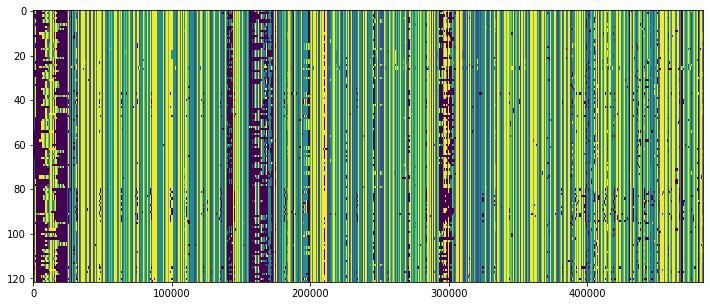

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.imshow(encoding, aspect='auto')